## Text Analytics

In this session, you will learn Python procedures for text analytics, including text analysis and visualization, text classification and sentiment mining.

## Table of Content
   
1. [Data Visualization](#cell_DataVisual)
    - [Loading Data](#cell_LoadingData)
    - [Basic Plot](#cell_Basic)
    - [Box plot](#cell_Box)
    
    
2. [Machine Learning Based Sentiment Analysis](#cell_Textclassification)
    - [Bag of Words Features](#cell_bow)
    - [Model Construction](#cell_Model)


3. [Dimensionality Reduction](#cell_DimensionalityReduction)


4. [Lexicon-Based Sentiment Analysis](#cell_Sentiment)


5. [Aspect-Level Sentiment Analysis](#cell_AspectSentiment)


6. [Sentiment Summarization](#cell_Summarization)

<a id = "cell_DataVisual"></a>
### 1. Data Visualization

<a id = "cell_LoadingData"></a>
### Loading Data

We will use "Womens Clothing E-Commerce Reviews data set" (available on [Kaggle](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews)). We are going to explore text data as well as visualize numeric and categorical attributes.

In [ ]:
import pandas as pd

df = pd.read_csv('ClothingReviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
# check the dimension of your dataframe
df.shape

(22641, 11)

In [ ]:
# calculate the NaNs in all columns
df.isnull().sum()

,0
Unnamed: 0,0
Clothing ID,0
Age,0
Title,2966
Review Text,0
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,13
Department Name,13


After a brief inspection of the data, we found there are a series of data pre-processing we have to conduct.
   - Remove the “Title” feature.
   - Remove the rows where “Review Text” were missing.
   - Clean “Review Text” column.
   - Create new feature for the length of the review.
   - Create new feature for the word count of the review.

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True) # axis = 1 specify we want to drop columns
df.drop('Title', axis=1, inplace=True) # Remove the “Title” feature
df = df[~df['Review Text'].isnull()] #Remove the rows where “Review Text” were missing. > / . - +

#Defind a function to clean text
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')
    ReviewText = ReviewText.str.replace(',', ' ')
    return ReviewText

df['Review Text'] = preprocess(df['Review Text']) #Clean text

#Create new feature for the length of the review.
df['review_len'] = df['Review Text'].astype(str).apply(len)
#Create new feature for the word count of the review.
df['word_count'] = df['Review Text'].apply(lambda x: len(str(x).split()))
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,review_len,word_count
0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,53,8
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,303,62
2,1077,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,500,98
3,1049,50,I love love love this jumpsuit. it's fun fl...,5,1,0,General Petite,Bottoms,Pants,124,22
4,847,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,192,36


In [ ]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,review_len,word_count
count,22641.000000,22641.000000,22641.000000,22641.000000,22641.000000,22641.000000,22641.000000
mean,919.332362,43.280376,4.183561,0.818868,2.630582,308.687867,60.202111
std,202.266874,12.326980,1.115762,0.385136,5.786164,143.940065,28.537290
min,1.000000,18.000000,1.000000,0.000000,0.000000,9.000000,2.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000,186.000000,36.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000,301.000000,59.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000,459.000000,88.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000,508.000000,115.000000


In [ ]:
# calculate the NaNs in all columns
df.isnull().sum()

,0
Clothing ID,0
Age,0
Review Text,0
Rating,0
Recommended IND,0
Positive Feedback Count,0
Division Name,13
Department Name,13
Class Name,13
review_len,0


<a id = "cell_Basic"></a>
### Basic Plot

We need to load `matplotlib` library first:

In [ ]:
from matplotlib import pyplot

Histogram plot of **_age_**  distribution:

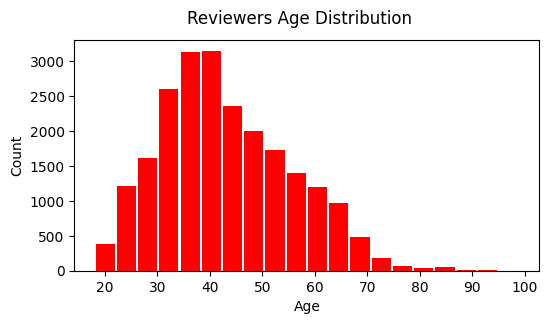

In [ ]:
pyplot.figure(figsize=(6, 3))
pyplot.hist(df['Age'], bins=20, rwidth=0.9, color ='red') #change the number of bins and test
pyplot.suptitle('Reviewers Age Distribution')
pyplot.xlabel('Age')
pyplot.ylabel('Count') ;

Bar plot **_rating_** count:

        Clothing ID    Age  Review Text
Rating                                 
1               821    821          821
2              1549   1549         1549
3              2823   2823         2823
4              4908   4908         4908
5             12540  12540        12540
Note that the Number of Review Text column may be less than others Because some cell in Review Text colum is Null


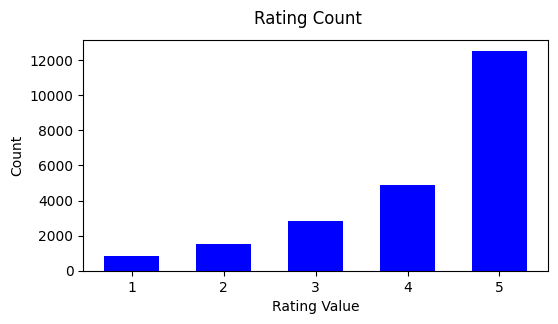

In [ ]:
#Count reviews by ratings, only show three columns Clothing ID, Age and Review Text
RatingCount = df.groupby('Rating').count()[['Clothing ID','Age','Review Text']]
print(RatingCount)
print('Note that the Number of Review Text column may be less than others \
Because some cell in Review Text colum is Null')

pyplot.figure(figsize=(6, 3))
pyplot.bar(RatingCount.index.values,RatingCount['Clothing ID'], color='blue', width=0.6)
pyplot.suptitle('Rating Count')
pyplot.xlabel('Rating Value')
pyplot.ylabel('Count') ;

<a id = "cell_Box"></a>
### Box plot

Box plots for reviewer **_age_** by **_department_**:

/tmp/ipython-input-14-2772611085.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(AgeData, labels = DepartmentNames);


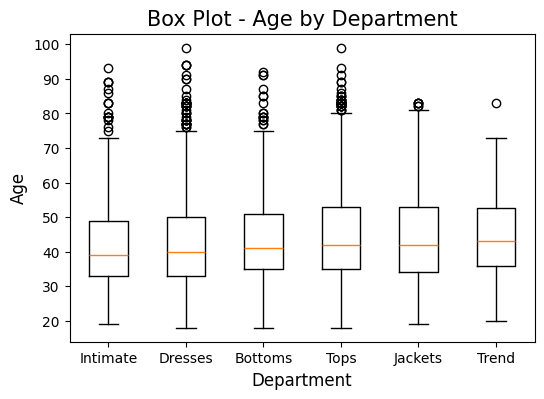

In [ ]:
#Get name of departments - not including null (nan) value.
DepartmentNames = df[~df['Department Name'].isnull()]['Department Name'].unique()

#Construct a list of Age data for departments
AgeData = []
for i in range(len(DepartmentNames)):
    AgeData.append(df.loc[df['Department Name'] == DepartmentNames[i]]['Age'])

#Create a new figure
pyplot.figure(figsize=(6,4))
pyplot.title('Box Plot - Age by Department', fontsize=15)
pyplot.xlabel('Department', fontsize=12)
pyplot.ylabel('Age', fontsize=12)
pyplot.boxplot(AgeData, labels = DepartmentNames);

Visualize the Label Column for Sentiment Analysis

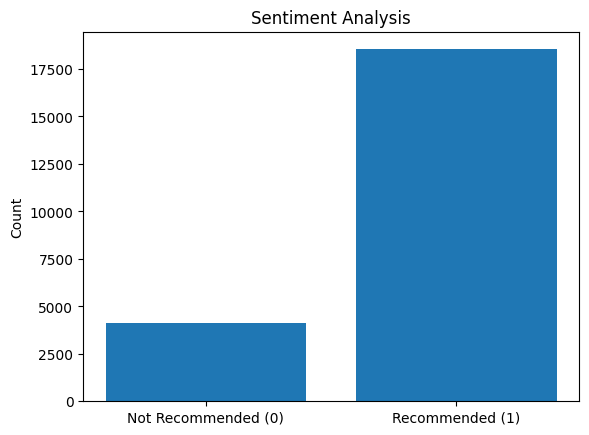

In [ ]:
counts = df['Recommended IND'].value_counts()

# Plotting the bar chart
pyplot.bar(counts.index, counts.values)

# Adding labels and title
pyplot.ylabel('Count')
pyplot.title('Sentiment Analysis')
pyplot.xticks(counts.index, ['Recommended (1)','Not Recommended (0)'])

# Show plot
pyplot.show()

<a id = "cell_Textclassification"></a>
### 2. Machine Learning Based Sentiment Analysis

Text classification is one of the important tasks of text mining. It is a supervised approach. Identifying category or class of given text such as a blog, book, web page, news articles, and tweets. It has various application in today's computer world such as spam detection, task categorization in CRM services, categorizing products on E-retailer websites, classifying the content of websites for a search engine, sentiments of customer feedback, etc.

In this exercise, we shall build a classification model to predict if customers would recommend clothes based on their review comments, which can be used to analyze customers' sentiments.

<a id = "cell_bow"></a>
### Bag of Words Features

Bag-of-words model(BoW ) is the simplest way of extracting features from the text. BoW converts text into the matrix of occurrence of words within a document. This model concerns about whether given words occurred or not in the document.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

text_counts = cv.fit_transform(df['Review Text'])
print('Bag of Word Matrix size: ', text_counts.shape)
print('Data in the first row:\n', text_counts[1,:])


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Bag of Word Matrix size:  (22641, 13875)
Data in the first row:
 <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 26 stored elements and shape (1, 13875)>
  Coords	Values
  (0, 7264)	2
  (0, 4036)	1
  (0, 10359)	2
  (0, 11306)	1
  (0, 9350)	1
  (0, 5729)	1
  (0, 11644)	1
  (0, 7343)	1
  (0, 5424)	1
  (0, 3702)	1
  (0, 1444)	2
  (0, 8441)	1
  (0, 8373)	1
  (0, 8899)	3
  (0, 1844)	1
  (0, 453)	1
  (0, 512)	1
  (0, 6993)	1
  (0, 5934)	1
  (0, 6672)	1
  (0, 7144)	1
  (0, 6760)	1
  (0, 3538)	1
  (0, 12693)	1
  (0, 7679)	1
  (0, 12695)	1


In [ ]:
# Some basic activities to familiarise with the BoW represntation
#check the word corresponds to a column of the bag-of-words matrix
print("The word corresponds to column 1000 is:", cv.get_feature_names_out()[1000])
# what is the maximum frequency in the matrix
print(text_counts.max())
# Calculate the sum of frequencies for each word across all documents
word_frequencies = text_counts.sum(axis=0)
# Find the index of the most frequent word
most_frequent_word_index = word_frequencies.argmax()
# Get the most frequent word using the index
most_frequent_word = cv.get_feature_names_out()[most_frequent_word_index]
print("The most frequent word is:", most_frequent_word)

The word corresponds to column 1000 is: anxious
15
The most frequent word is: dress


In [ ]:
# Discuss to explore how the BoW matrix is setup
# list first 10 words
print("First 10 words:{}\n".format(cv.get_feature_names_out()[:10]))
#list last 10 words
print("First 10 words:{}\n".format(cv.get_feature_names_out()[-10:]))


First 10 words:['0' '00' '000' '00p' '02' '03' '03dd' '04' '06' '0dd']

First 10 words:['zippers' 'zippie' 'zipping' 'zips' 'zombie' 'zone' 'zoolander' 'zoom'
 'zooming' 'zuma']



In [ ]:
# Now we can examine how the first review is mapped into BoW representation
# Review - Absolutely wonderful - silky and sexy and comfortable

# print the non zero frequncies in the first row
print(text_counts[0,:])

# get the corresponding word in the first row based on the column index in to a list
print('\n',[cv.get_feature_names_out()[x] for x in a[1]])


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (1, 13875)>
  Coords	Values
  (0, 578)	1
  (0, 2788)	1
  (0, 10697)	1
  (0, 10942)	1
  (0, 13648)	1

 ['absolutely', 'comfortable', 'sexy', 'silky', 'wonderful']


In [ ]:
cv.get_feature_names_out()[a[1]]

array(['absolutely', 'comfortable', 'sexy', 'silky', 'wonderful'],
      dtype=object)

<a id = "cell_Model"></a>
### Model Construction

Split the data for hold-out test:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Recommended IND'], test_size=0.3, random_state=1)

### <font color="blue"> Exercise
Examine the use of "stratify" parameter when splitting data

In [ ]:
#Examine the shape of the test and train sets without stratify parameter
import numpy as np
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


print("\nTraining labels distribution :\n", np.bincount(y_train))
print("\nTest labels distribution :\n", np.bincount(y_test))


X_train shape: (15848, 13875)
y_train shape: (15848,)
X_test shape: (6793, 13875)
y_test shape: (6793,)

Training labels distribution :
 [ 2895 12953]

Test labels distribution :
 [1206 5587]


In [ ]:
#Examine the shape of the test and train sets with stratify parameter
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df['Recommended IND'], test_size=0.3, random_state=1, stratify=df['Recommended IND'])

#
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


print("\nTraining labels distribution :\n", np.bincount(y_train))
print("\nTest labels distribution :\n", np.bincount(y_test))

X_train shape: (15848, 13875)
y_train shape: (15848,)
X_test shape: (6793, 13875)
y_test shape: (6793,)

Training labels distribution :
 [ 2871 12977]

Test labels distribution :
 [1230 5563]


Train and evaluate Naive Bayes classifier:

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)

print("MultinomialNB Accuracy:", round(metrics.accuracy_score(y_test, predicted),3))
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, predicted))

MultinomialNB Accuracy: 0.886
Confusion Matrix:
 [[ 790  440]
 [ 333 5230]]


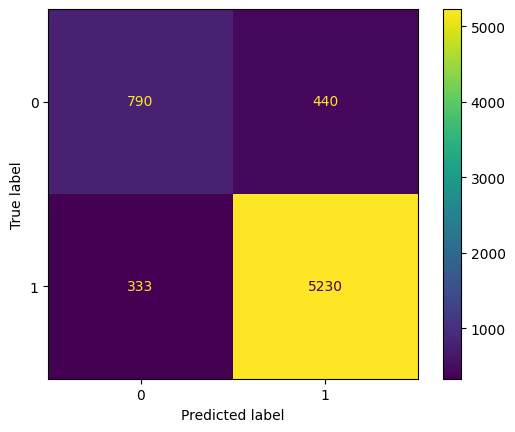

In [ ]:
# Exercise - visualise the confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(y_test, predicted, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()


<a id = "cell_DimensionalityReduction"></a>
### 3. Dimensionality Reduction


<a id = "cell_Univariate"></a>
### Univariate Selection:

Statistical tests can be used to select those features that have the strongest relationships with the output variable. The `scikit-learn` library provides the `SelectKBest` class, which can be used with a suite of different statistical tests to select a specific number of features.

In [ ]:
from sklearn.feature_selection import SelectKBest

#Get the target label
Target = df['Recommended IND']
#We will select the top 100 features
test = SelectKBest(k=100)
#Fit the function for ranking the features by score
fit = test.fit(text_counts, Target)
UnivariateFeatures = fit.transform(text_counts)
print('Reduced Data Set size:',UnivariateFeatures.shape)

Reduced Data Set size: (22641, 100)


Evaluate the performance of **Logistic Regression** based on the reduced features sets

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def evaluation(feature_set,Target):
    X_train, X_test, y_train, y_test = train_test_split(
        feature_set, Target, test_size=0.3, random_state=123)
    clf = LogisticRegression(solver='liblinear').fit(X_train, y_train)
    predicted= clf.predict(X_test)
    return metrics.accuracy_score(y_test, predicted)

print('UnivariateFeatures Accuracy:', round(evaluation(UnivariateFeatures,Target),3))

UnivariateFeatures Accuracy: 0.883


<a id = "cell_Sentiment"></a>
###  4. Lexicon-based Sentiment Analysis

This approach uses a variety of words annotated by polarity score, to decide the general assessment score of a given content. The `nltk.sentiment` library provides `SentimentIntensityAnalyzer` moudle, which allows for estimating setiment directly from natural text.

In [ ]:
# first, we import the relevant modules from the NLTK library
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
#Initialize an instance of SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

message_text = df['Review Text'][1]
print('Review Comment:\n', message_text)

Review Comment:
 Love this dress!  it's sooo pretty.  i happened to find it in a store  and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.


In [ ]:
#Estimate sentiment scores
scores = sid.polarity_scores(message_text)
for key in sorted(scores):
        print('{0}: {1} \n'.format(key, scores[key]), end='')
print('True Recommedation Label was: ', df['Recommended IND'][1])

compound: 0.9729 
neg: 0.0 
neu: 0.664 
pos: 0.336 
True Recommedation Label was:  1


The `compound` value show the overall sentiment of the text. A positive compound value indicate overall positive sentiment, while a negative compound value indicates overall negative sentiment. A threshold `(e.g., 0.1, 0.2, -0.1, -0.2)` is usually applied to the compound value to classify the text into positive or negative to ensure the sentiment is significant.

<a id = "cell_AspectSentiment"></a>
###  5. Aspect-Level Sentiment Analysis

Aspect-based sentiment analysis is a text analysis technique that breaks down text into aspects (*_attributes_* or *_components_* of a product or service), and then allocates each one a sentiment level (*_positive_*, *_negative_* or *_neutral_*).

In this exercise, we shall compute the sentiment scores with repect to specific clothing features, such as *_color_*, *_material_* and *_size_*.

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#A sample review comment
ReviewComment = 'the color is really nice charcoal with shimmer, and went well with pencil skirts,\
flare pants, etc. the material feels very cheap and disapointing. on it will cause it to rip the fabric. \
pretty disappointed as it was going to be my christmas dress this year! \
needless to say it will be going back. Material is bad, the size is verys mall and uncomfortable. \
with a leg opening the size of my waist and hem line above my ankle, and front pleats to make me fluffy,\
i think you can imagine that it is not a flattering look. In generall, Hate the material, Love the color.'
print(ReviewComment)

#Check the overall sentiment
sid = SentimentIntensityAnalyzer()
OverallSen = sid.polarity_scores(ReviewComment)
print('OVERALL SENTIMENT SCORE: \n', OverallSen)

the color is really nice charcoal with shimmer, and went well with pencil skirts,flare pants, etc. the material feels very cheap and disapointing. on it will cause it to rip the fabric. pretty disappointed as it was going to be my christmas dress this year! needless to say it will be going back. Material is bad, the size is verys mall and uncomfortable. with a leg opening the size of my waist and hem line above my ankle, and front pleats to make me fluffy,i think you can imagine that it is not a flattering look. In generall, Hate the material, Love the color.
OVERALL SENTIMENT SCORE: 
 {'neg': 0.126, 'neu': 0.77, 'pos': 0.104, 'compound': -0.3738}


In [ ]:
#Compute Sentiment Score by text trunk
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

ReviewComment=ReviewComment.replace(',','.')
sents =  sent_tokenize(ReviewComment)
scores = []
for s in range(len(sents)):
       scores.append(sid.polarity_scores(sents[s]))
[s for s in scores] #Show sentiment score of individual trunks

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[{'neg': 0.0, 'neu': 0.694, 'pos': 0.306, 'compound': 0.4754},
 {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.2732},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.176, 'neu': 0.625, 'pos': 0.198, 'compound': 0.1007},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'compound': -0.5423},
 {'neg': 0.302, 'neu': 0.698, 'pos': 0.0, 'compound': -0.3818},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'compound': -0.2411},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.649, 'neu': 0.351, 'pos': 0.0, 'compound': -0.5719},
 {'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'compound': 0.6369}]

In [ ]:
from statistics import mean
#Define function to compute sentiment score for aspect
def aspect_sentiment(aspect,sents,scores):
    AspSen = []
    for s in range(len(sents)):
        #Check if the aspect is mentioned in the text trunk
        Index = sents[s].find(aspect)
        if Index > 0:
            AspSen.append(scores[s])
    Sentiment = [AspSen[x]['compound'] for x in range(len(AspSen))]

    #Return average of sentiment scores of aspect
    return [round(mean(Sentiment),3)]

print('color: ', aspect_sentiment('color',sents,scores))
print('material: ', aspect_sentiment('material',sents,scores))
print('size: ', aspect_sentiment('size',sents,scores))

color:  [0.556]
material:  [-0.286]
size:  [-0.191]


For the current review text, the sentiment for `color` was positive, while the sentiment for `material` and `size` was negative.

<a id = "cell_Summarization"></a>
###  6. Sentiment Summarization

Once the sentiment scores are estimated from each review or sentence, they need to be aggregated with respect aspects to provide a summary of the overall sentiments.


In this exercie, we will compare the overall positive and negative sentiments of all customers expressed toward "color", "material", and "size" of Knits and Jeans in the clothing store.

In [ ]:
#Define a function to compute overall sentiment by aspect
def aspect_sentiment(aspect,reviewtext):
    SentimentIndex = []

    # For each review in the data set
    for rev in (reviewtext):
        try:
            sens =  sent_tokenize(rev)
        except:
            continue
        #Compute sentiment scores by each sentence.
        ReviewLevelSentiment = []
        for s in range(len(sens)):
            IndexAspect = sens[s].find(aspect)
            if IndexAspect > 0:
                ReviewLevelSentiment.append(sid.polarity_scores(sens[s]))

        #Aggregate sentiment scores for each review
        try:
            Compound = mean([ReviewLevelSentiment[x]['compound'] for x in range(len(ReviewLevelSentiment))])
        except:
            Compound = 0

        # Generate sentiment index based on sentiment score
        SentimentIndex.append(Compound)

         # Define thresholds
        positive_threshold = 0.1
        negative_threshold = -0.1

        # Initialize counters
        positive_count = 0
        negative_count = 0

        for value in SentimentIndex:
            if value > positive_threshold:
                positive_count += 1
            elif value < negative_threshold:
                negative_count += 1
        Total_Count = positive_count + negative_count
    return [round(positive_count/Total_Count,2), round(negative_count/Total_Count,2)]

In [ ]:
#Define Aspects to compute sentiment
aspects = ['color','material','size']

#Extract Reviews for Jeans only and compute aspect sentiments
print('Sentiment scores for Jeans:')
JeanReviews = df.loc[df['Class Name'] == 'Jeans']
SentimentScoresJeans = []
for a in range(len(aspects)):
    SentimentScoresJeans.append(aspect_sentiment(aspects[a],JeanReviews['Review Text']))
    print(aspects[a])
    print(SentimentScoresJeans[a])

print('--------------------------------')
#Extract Reviews for Knits only and compute aspect sentiments
print('Sentiment scores for Knits:')
KnitReviews = df.loc[df['Class Name'] == 'Knits']
SentimentScoresKnits = []
for a in range(len(aspects)):
    SentimentScoresKnits.append(aspect_sentiment(aspects[a],KnitReviews['Review Text']))
    print(aspects[a])
    print(SentimentScoresKnits[a])

Sentiment scores for Jeans:
color
[0.94, 0.06]
material
[0.92, 0.08]
size
[0.89, 0.11]
--------------------------------
Sentiment scores for Knits:
color
[0.95, 0.05]
material
[0.87, 0.13]
size
[0.91, 0.09]


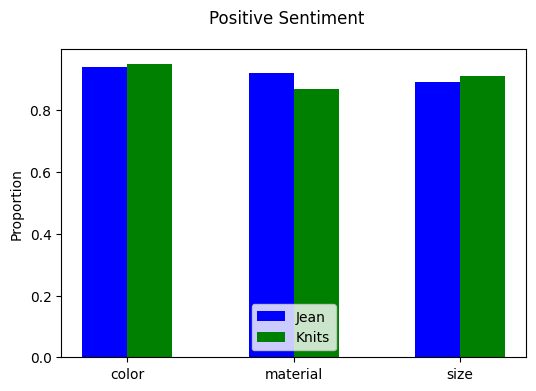

In [ ]:
import numpy

PositiveJean = [SentimentScoresJeans[x][0] for x in range(len(SentimentScoresJeans))]
PositiveKnits = [SentimentScoresKnits[x][0] for x in range(len(SentimentScoresKnits))]


ind = numpy.arange(len(aspects))  # the x locations for the groups
width = 0.27       # the width of the bars

#Plot figure for positive reviews
figPo = pyplot.figure(figsize=(6, 4))
ax = figPo.add_subplot(111)

rectsPositiveJean = ax.bar(aspects, PositiveJean, width, color='b')
rectsPositiveKnits = ax.bar(ind+width, PositiveKnits, width, color='g')

ax.set_ylabel('Proportion')
ax.set_xticks(ind+0.5*width)
ax.legend( (rectsPositiveJean[0], rectsPositiveKnits[0]), ('Jean','Knits'),loc='lower center' )
pyplot.suptitle('Positive Sentiment');

The figure show that both product recieved highly positive sentiments, with large proportions. Among them, Jeans recieved slightly more positive sentiments for "material" than Knits, but less positve sentiments for "color" and "size".



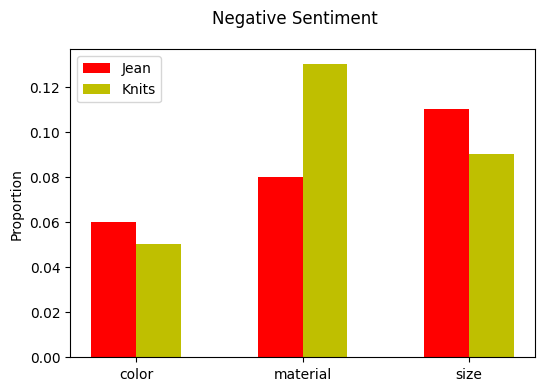

In [ ]:
import numpy

NegativeJean = [SentimentScoresJeans[x][1] for x in range(len(SentimentScoresJeans))]
NegativeKnits = [SentimentScoresKnits[x][1] for x in range(len(SentimentScoresKnits))]


ind = numpy.arange(len(aspects))  # the x locations for the groups
width = 0.27       # the width of the bars

#Plot figure for positive reviews
figPo = pyplot.figure(figsize=(6, 4))
ax = figPo.add_subplot(111)

rectsNegativeJean = ax.bar(aspects, NegativeJean, width, color='r')
rectsNegativeKnits = ax.bar(ind+width, NegativeKnits, width, color='y')

ax.set_ylabel('Proportion')
ax.set_xticks(ind+0.5*width)
ax.legend( (rectsNegativeJean[0], rectsNegativeKnits[0]), ('Jean','Knits'),loc='upper left' )
pyplot.suptitle('Negative Sentiment');

The figure show that "material" and "size" have the higher negative sentiments than color for both products. Knits recieved more negative sentiment for "material" while Jean recieved more negative sentiments for "size".

**Possible Business Implications:**
- The clothing business should prioritize enhancing the 'material' and 'size' aspects of both products to enhance customer satisfaction. More attention can be devoted to improving the material quality of Knits, while Jeans should focus on size optimization.


### References:

- Li, S. (2019). A Complete Exploratory Data Analysis and Visualization for Text Data, towardsdatascience.com, https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
- Navlani, A. (2019). Text Analytics for Beginners using NLTK, datacamp.com, https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
- Hunter, J., Dale, D., Firing, E., Droettboom, M. & Matplotlib development team (2012). Pyplot Tutorial, Matplotlib, https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html
- Zoë Wilkinson Saldaña, "Sentiment Analysis for Exploratory Data Analysis," The Programming Historian 7 (2018), https://programminghistorian.org/en/lessons/sentiment-analysis.